_________

# Random Forest Algorithm to Predecte Diamonds Price


Diamonds are the most valuable stone in the world. Its price varies depending on many factors such as the diamond’s purity, color, cut and carat. Studying and evaluating the diamond’s features identifies the dependency of these features with the diamond’s price. <br> 

   The aim of this analysis is to find the correlation between the dataset features by building a Random Forest Algorithm predictor which predict the diamond’s price based on different independent features.



_____

# Import Important Packages

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Exploration and Cleaning 

In [2]:
# Importing the dataset
dataset= pd.read_csv('./diamonds.csv')

In [3]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#drop the first column which is not important 
dataset.drop('Unnamed: 0', axis=1, inplace =True)

In [5]:
#check the shape of the datasets
print("There are {} rows and {} coloumns".format(dataset.shape[0],dataset.shape[1]))

There are 53940 rows and 10 coloumns


In [6]:
# Ckeck if there are any missing data
dataset.info()  
# No missing data in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
#Ckeck the duplicated rows and drop it
np.where(dataset.duplicated())[0]
dataset.drop_duplicates(keep=False, inplace=True)

In [8]:
#check the shape of the datasets after removing duplicate valuse
print("There are {} rows and {} coloumns".format(dataset.shape[0],dataset.shape[1]))

There are 53651 rows and 10 coloumns


In [9]:
#take a deeper look at the data 
dataset.describe()

,carat,depth,table,price,x,y,z
count,53651.000000,53651.000000,53651.000000,53651.000000,53651.000000,53651.000000,53651.000000
mean,0.797619,61.746778,57.459013,3933.273993,5.731281,5.734788,3.538700
std,0.472752,1.427142,2.232803,3986.677556,1.119591,1.140246,0.704353
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,78.200000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the data Description above we see that there are some problems in <strong> x,y and z </strong> where there are <strong>0s in the min velues</strong>. To be sure we will explore these features more closely.

In [10]:
#View 0 values in x, y and z
dataset.loc[(dataset['x']==0) | (dataset['y']==0) | (dataset['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


We can see there are 0 values in x, y and z which are not acceptable. dropping these values will not affect the data as the dataset is large.

In [11]:
# dropping 0 values
dataset = dataset.drop(dataset.index[np.where(dataset['x'] == 0)])
dataset = dataset.drop(dataset.index[np.where(dataset['y'] == 0)])
dataset = dataset.drop(dataset.index[np.where(dataset['z'] == 0)])
dataset.reset_index(drop=True, inplace =True)

___

# Feature Engineering 

<strong>Feature Engineering</strong> is the act of constructing from existing data new features to train machine learning models. Here we are creating a "Valume" feature from x, y and z which are the three-dimensional space of a diamond.

In [12]:
# constructing the new feature
dataset['volume'] = dataset['x'] * dataset['y'] * dataset['z']

In [13]:
# dropping previous features
dataset.drop(['x','y','z'], axis=1, inplace = True)

In [14]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


_____

# Dealing with Categorical Values


   <strong>OneHotEncoder</strong> is part of the SciKit Learn library in Python. it is used to convert categorical variables into numbers, which is a form that machine learning algorithms can understand to make better predictions. <br>

In [15]:
#Convert categorical variable into dummy variables using One-hot method to encode the data
mdummies = pd.get_dummies(dataset[['cut','color','clarity']],drop_first=True)

In [16]:
# Merging dummies with the Original data
new_dataset = dataset[['carat', 'depth','table','price','volume']].join(mdummies)

In [17]:
new_dataset.head()

,carat,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


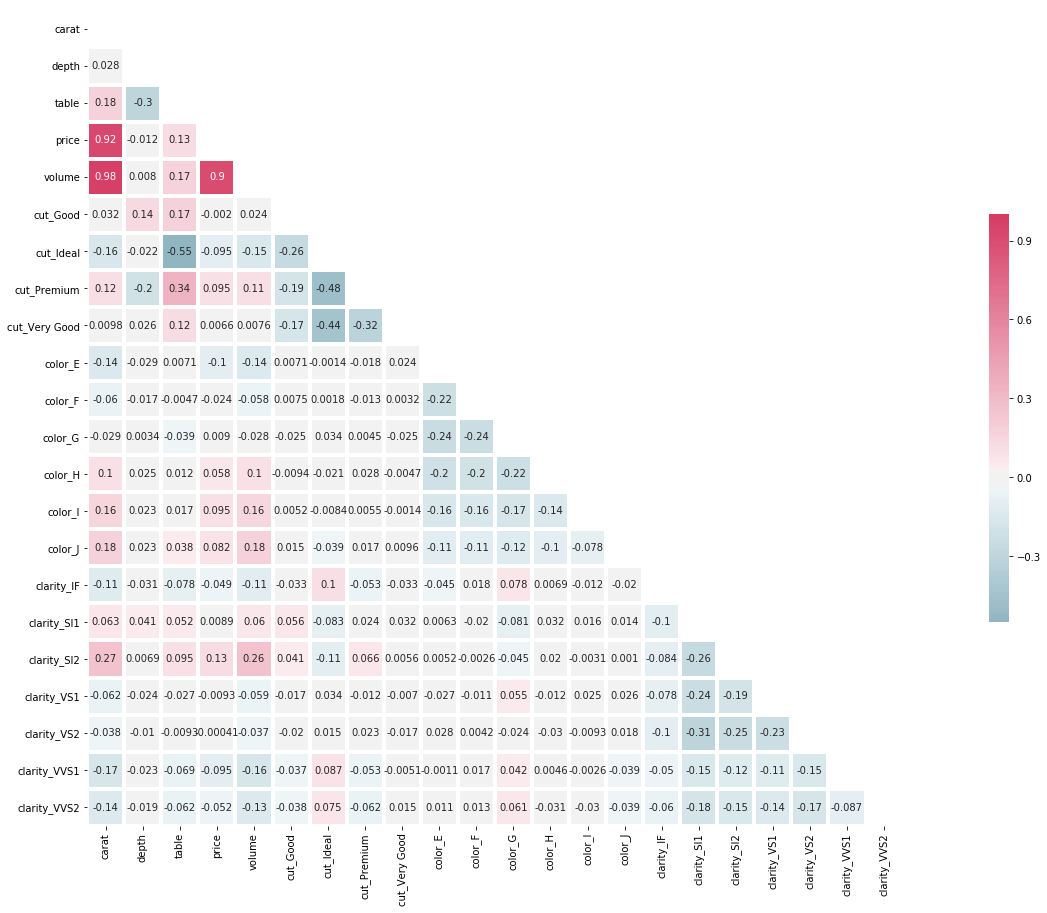

In [18]:
# Plotting the corrolation matrix of the dataset

# Generate a mask for the upper triangle
mask = np.zeros_like(new_dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(31, 15))

# Generate a custom colormap
cmap = sns.diverging_palette(220, 2, as_cmap=True)


# Draw the heatmap with the mask 
sns.heatmap(new_dataset.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=3,annot=True, cbar_kws={"shrink": .5})
plt.show()

It is clear that there is a<strong> high corrolation</strong> between <strong>Price, Valume</strong> and <strong>Carat</strong>. A corrolation matrix will present the corrolation more clearly.

____

# Feature Selection

After cleaning and preparing the dataset, we will split the features from the target feature which is the "Price". After that we will move on to feature selection. A Univariate feature selection method werew used which works by selecting the best features based on univariate statistical tests.

In [19]:
# split the dataset into a matrix of features and a target vector

# Labels are the Target feature
y = np.array(new_dataset['price']).astype(float)

# Remove the labels from the features
# axis 1 refers to the columns
X= new_dataset.drop('price', axis = 1).astype(float)

# To avoid multicollinearity
X = X.iloc[:, :].values

In [20]:
#ensure size of features and labels are consistant together
print('features shape is: {} while labels shape is: {}'.format(X.shape, y.shape))

features shape is: (53633, 21) while labels shape is: (53633,)


In [21]:
#SelectKBest removes all but the k highest scoring features
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif

sel_dataset = SelectKBest(f_classif, k=10).fit_transform(X, y)
sel_dataset.shape

(53633, 10)

The features are now reduced to 10 best indicators.

____

# Seplit Training and Testing Data

Deviding the data into training and testing to train our model is a very crucial step in machine learning. 70% of the data will be used for training and 30% for testing. In this stage X_train and y_train will be used for training, later, the model will be feed with only X_test data to evaluate our model accuracy.

### Splitting the data after the feature selection

In [22]:
# Splitting the dataset into the 70% Training set and 30% Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sel_dataset, y, test_size = 0.3)

### Splitting the data without feature selection

In [23]:
# Splitting the dataset into the 70% Training set and 30% Test set
from sklearn.model_selection import train_test_split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size = 0.3)

______

# Applying Random Forest Regression 

<strong>Random Forest model</strong> is well known effective ensemble learning model for predictive analysis and it is an algorithm of supervised classification. It is an ensemble learning method which groups many decision trees into one strong regressor and outputs depending on the tree’s majority votes the mean prediction for regression problems. The prediction process is made by combining a sequence of base model’s decisions. 

## Model Development

In [24]:
# With feature selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score, mean_squared_error
from sklearn.model_selection import cross_val_score

sel_model = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)
sel_model.fit(X_train, y_train)
y_pred = sel_model.predict(X_test)

# Calculate the absolute errors
errors = abs(y_pred - y_test)

In [25]:
# No feature selection

model = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)
model.fit(X_train_set, y_train_set)
y_pred_set = model.predict(X_test_set)

# Calculate the absolute errors
errors = abs(y_pred_set - y_test_set)

  _____

## Model Evaluation

We will evaluate the performace of our model with Accuracy, EVS, MAE, RMSE and R2 score.



<strong>Explained Variance Score (EVS) </strong> is the ratio between variance of error and variance of true values. It measures how well our model can explain variations in our dataset. <strong>  The highest value of the model can achieve is 1.0 </strong>
<img src="http://www.enlistq.com/wp-content/uploads/2018/04/explained_variance.png" alt="EVS" style="width:300px;height:60px;">

<strong>Mean Absolute Error (MAE)</strong> is the average measure of how much our predicted value can drift from the the real value. <strong> Ranges from 0 to ∞</strong>
<img src="http://www.enlistq.com/wp-content/uploads/2018/04/mean_absolute_error.png" alt="MAE" style="width:300px;height:60px;"></img>

<strong> Root Mean Squared Error (RMSE)</strong> it is the standard deviation of the prediction errors. Which measures the difference between predicted values and the actual values. <strong> The closer RMSE to 0 better the accuracy.</strong> 
<img src="https://qph.fs.quoracdn.net/main-qimg-008e40d98b5ce869d6b19c8eb9108178" alt="RMSE" style="width:300px;height:60px;"></img>

<strong>R2 Score</strong> measures the model's accuracy on future values prediction. <strong>R2 score usually falls between 0 and 1</strong>

<img src="http://www.enlistq.com/wp-content/uploads/2018/04/r2.png" alt="R2" style="width:300px;height:60px;">

## Model Evaluation <strong> With</strong> Feature Selection


In [26]:
print('')
print('Random Forest Model With Feature Selection')
accuracies = cross_val_score(estimator = sel_model, cv=5,  X = X_train, y = y_train)
print('')
print('Accuracy Score: %.4f' % sel_model.score(X_test, y_test))
print(accuracies)
print('')

# Print out the explained variance score (evs)
print('EVS: %.2f' % explained_variance_score(y_test, y_pred))

# Print out the mean absolute error (mae)
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

# Print out the root mean squared error (rmse)
print('RMSE: %0.2f ' % mean_squared_error(y_test, y_pred)**0.5)

# Print out the R2 score (R2)
print('R2 Score: %.2f' % r2_score(y_test, y_pred))


Random Forest Model With Feature Selection

Accuracy Score: 0.9522
[0.95397412 0.94730375 0.9551813  0.9520493  0.94577053]

EVS: 0.95
MAE: 410.52
RMSE: 868.59 
R2 Score: 0.95


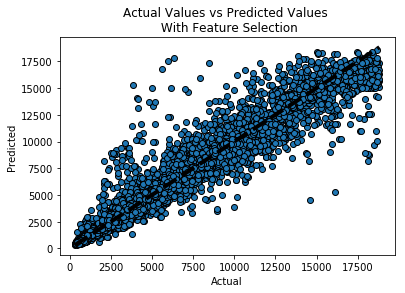

In [27]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Values vs Predicted Values \n With Feature Selection")
plt.show()

_____

## Model Evaluation <strong> Without </strong> Feature Selection

In [28]:
print('')
print('Random Forest Model Without Feature Selection')
accuracies = cross_val_score(estimator = model, cv=5,  X = X_train_set, y = y_train_set)
print('')
print('Accuracy Score: %.4f' % model.score(X_test_set, y_test_set))
print(accuracies)
print('')

# Print out the explained variance score (evs)
print('EVS: %.2f' % explained_variance_score(y_test_set, y_pred_set))

# Print out the mean absolute error (mae)
print('MAE: %.2f' % mean_absolute_error(y_test_set, y_pred_set))

# Print out the root mean squared error (rmse)
print('RMSE: %0.2f ' % mean_squared_error(y_test_set, y_pred_set)**0.5)

# Print out the R2 score (R2)
print('R2 Score: %.2f' % r2_score(y_test_set, y_pred_set))


Random Forest Model Without Feature Selection

Accuracy Score: 0.9754
[0.97516658 0.97532932 0.97290685 0.97375736 0.9744298 ]

EVS: 0.98
MAE: 304.00
RMSE: 622.47 
R2 Score: 0.98


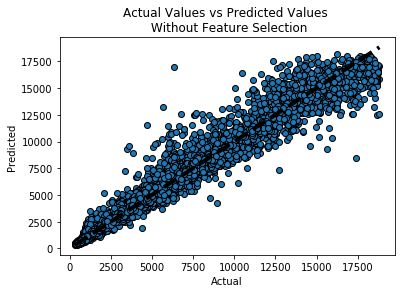

In [29]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()

ax.scatter(y_test_set, y_pred_set, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Values vs Predicted Values \n Without Feature Selection")
plt.show()

_____

# Results 

From the above analysis it is clear that for predicting the diamond's price it is important to have all the features of a diamond. The random forest model Produced higher prediction accuracy of 98% with all the dataset features, while with feature selection it resulted with 95% 